# P4 Evaluation - Credit Default Risk Prediction (Final Project)

## Introduction
Financial stability is very important for a bank. A banking system fundamentally relies on debt: having people deposit their money, investing the money, lending individuals or institutions the money, and taking the interest back later. However, it is critical for the bank's financial stability if debtors cannot repay the money. Hence, it is important to predict if a potential debtor can repay it before banks lend the money.


## Goals
In this jupyter notebook, we will apply unsupervised and supervised machine learning techniques to predict credit default risk. Specifically:
- For unsupervised learning:
    - We will perform dimension reduction with PCA and T-SNE to reduce the data representation to lower dimensions.
    - Then we visualize data in the new lower feature space with PCA and T-SNE. 
- For supervised learning:
    - We will train a binary classifier to predict whether an individual will experience financial distress in the next two years.
    - We will experiment with four different models (a DecisionTree classifier, a RandomForest classifier, and a LogisticRegression classifier, an ensemble model) and compare their performances.
    - By interpreting feature coefficients, we will extract features that are predictive of credit default risk.


## Data Overview
The [dataset](https://www.kaggle.com/competitions/GiveMeSomeCredit/overview) contains 150,000 case.

Each case has a target variable 'SeriousDlqin2yrs', indicating whether it has credit risk (value 1) or not (value 0).

Each case is represented by 10 features.

## Dictionary
Target variable
- SeriousDlqin2yrs: Person experienced 90 days past due delinquency or worse (Y/N)

features
- RevolvingUtilizationOfUnsecuredLines: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits (percentage)

- age: Age of borrower in years (integer)

- NumberOfTime30-59DaysPastDueNotWorse: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.(integer)

- DebtRatio: Monthly debt payments, alimony,living costs divided by monthy gross income (percentage)

- MonthlyIncome: Monthly income (real)

- NumberOfOpenCreditLinesAndLoans: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) (integer)

- NumberOfTimes90DaysLate: Number of times borrower has been 90 days or more past due. (integer)

- NumberRealEstateLoansOrLines: Number of mortgage and real estate loans including home equity lines of credit (integer)

- NumberOfTime60-89DaysPastDueNotWorse: Number of times borrower has been 60-89 days past due but no worse in the last 2 years. (integer)

- NumberOfDependents: Number of dependents in family excluding themselves (spouse, children etc.) (integer)


## Workflow
I. **[Exploratory Data Analysis](#EDA)**<br>
a) Data overview<br>
b) Data cleaning<br>
c) Descriptive statistics<br>
d) Data transformation with removing outliers and visualization<br>

II. **[Data Preparation for Model Training](#split)**<br>
a) Split data into training and testing sets<br>
b) Create a balanced training dataset<br>
c) Correlation matrix of the balanced training dataset<br>

III. **[Unsupervised Learning](#unsupervised)**<br>
a) Dimension reduction (PCA)<br>
b) Dimension reduction (T-SNE)<br>

IV. **[Supervised Learning](#supervised)**<br>
a) A DecisionTree classifier<br>
b) A RandomForest classifier<br>
c) A LogisticRegression classifier<br>
d) An Ensemble learning<br>
e) Discussions <br>



## Package installation

In [1]:
import sklearn
sklearn.__version__

'1.2.2'

## Import libraries

In [2]:
import numpy as np 
import pandas as pd

# EDA Libraries
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew
from sklearn.model_selection import ShuffleSplit

# Classifier Libraries
from sklearn import tree
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import datasets, decomposition

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.tree import export_graphviz
import graphviz



import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis
<a id="EDA"></a>
We will start with an exploratory data analysis to understand the dataset.

**Data overview**

In [3]:
df = pd.read_csv('/Users/minjunlee/Desktop/UChicago/Class/Spring Quarter/machine learning/Credit Default Risk/cs-training.csv')

In [4]:
df.shape, df.columns

((150000, 12),
 Index(['Unnamed: 0', 'SeriousDlqin2yrs',
        'RevolvingUtilizationOfUnsecuredLines', 'age',
        'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
        'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
        'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
        'NumberOfDependents'],
       dtype='object'))

In [5]:
df.head

<bound method NDFrame.head of         Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
0                1                 1                              0.766127   
1                2                 0                              0.957151   
2                3                 0                              0.658180   
3                4                 0                              0.233810   
4                5                 0                              0.907239   
...            ...               ...                                   ...   
149995      149996                 0                              0.040674   
149996      149997                 0                              0.299745   
149997      149998                 0                              0.246044   
149998      149999                 0                              0.000000   
149999      150000                 0                              0.850283   

        age  NumberOfTime30-59Day

In [6]:
# original class distribution: 0 as No potential credit risk, 1 as potential credit risk
Counter(df['SeriousDlqin2yrs'])

Counter({0: 139974, 1: 10026})

**Data Cleaning**

In [7]:
# Checking missing values
null_sum = df.isnull().sum()
null_sum

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [8]:
# For the two columns including missing values (MonthlyIncome, NumberOfDependents), we will fill in missing values with the median of that column.
df.drop(df[df['MonthlyIncome'].isna()].index, inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['MonthlyIncome'].isna().sum()

0

In [9]:
df.drop(df[df['NumberOfDependents'].isna()].index, inplace=True)
df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)
df['NumberOfDependents'].isna().sum()

0

In [10]:
# check duplicated samples
df.duplicated().sum()

0

Note: We tried to drop columns that have at least 30% missing values. There is no change when we drop those columns. Hence, we skip this step.

In [11]:
# check the data types
df.dtypes

Unnamed: 0                                int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [12]:
# converting the numerical columns into the float data type

num_col = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 
           'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
            'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

df[num_col] = df[num_col].astype('float')
df[num_col]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
149994,0.385742,50.0,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0
149995,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
149996,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
149998,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


In [13]:
df[num_col].dtypes

RevolvingUtilizationOfUnsecuredLines    float64
age                                     float64
NumberOfTime30-59DaysPastDueNotWorse    float64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans         float64
NumberOfTimes90DaysLate                 float64
NumberRealEstateLoansOrLines            float64
NumberOfTime60-89DaysPastDueNotWorse    float64
NumberOfDependents                      float64
dtype: object

**Descriptive statistics for numerical variables**

In [14]:
df[num_col].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [15]:
df.skew()

Unnamed: 0                               -0.000279
SeriousDlqin2yrs                          3.386203
RevolvingUtilizationOfUnsecuredLines    102.519812
age                                       0.227899
NumberOfTime30-59DaysPastDueNotWorse     26.705137
DebtRatio                                72.870065
MonthlyIncome                           114.040318
NumberOfOpenCreditLinesAndLoans           1.222839
NumberOfTimes90DaysLate                  27.633986
NumberRealEstateLoansOrLines              3.623151
NumberOfTime60-89DaysPastDueNotWorse     28.055524
NumberOfDependents                        1.430360
dtype: float64

According to the descriptive statistics above, almost all the columns seem to have outliers. We are going to deal with them separately. However, if we remove outliers one by one and then do the data transformation later, it will be unnecessarily redundant. Hence, in this step, we will combine both simply for efficiency.

#### Data transformation with removing outliers and visualization
- Given that all the features are numerical, all the data transformation will be the normalization of them.

#### 'Revolving Utilization Of Unsecured Lines'

<Axes: xlabel='RevolvingUtilizationOfUnsecuredLines'>

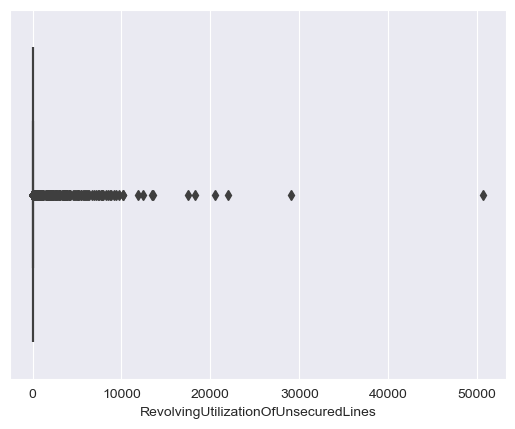

In [16]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x = df['RevolvingUtilizationOfUnsecuredLines'], orient = 'h')

In [17]:
Q1 = df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.25)
Q3 = df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
print(Q1, Q3, lower_thresh, upper_thresh)

0.035083989 0.579427876 -0.7814318415 1.3959437065


In [18]:
# Drop outliers
df.drop(df[df['RevolvingUtilizationOfUnsecuredLines'] > 1.35].index, inplace=True)
df.shape

(119688, 12)

<Axes: xlabel='Revolving_Utilization_Of_Unsecured_Lines_normalized', ylabel='Count'>

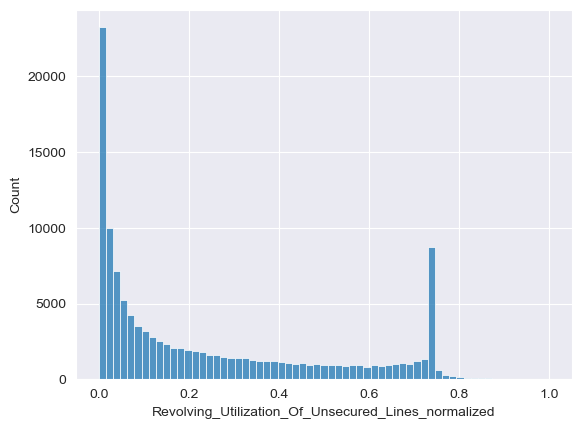

In [19]:
# feature scaling and visualization
scaler = MinMaxScaler(feature_range=(0,1))
df['Revolving_Utilization_Of_Unsecured_Lines_normalized'] = scaler.fit_transform(df[['RevolvingUtilizationOfUnsecuredLines']].values)
sns.histplot(df['Revolving_Utilization_Of_Unsecured_Lines_normalized'])

#### 'age'

<Axes: xlabel='age'>

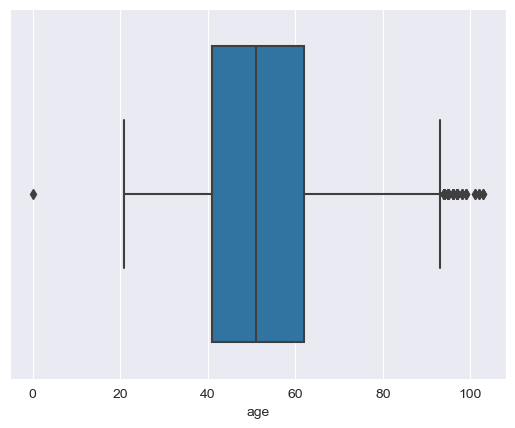

In [20]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x = df['age'], orient = 'h')

In [21]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print(Q1, Q3, lower_thresh, upper_thresh)

41.0 62.0 9.5 93.5


In [22]:
# Drop outliers
df.drop(df[df['age'] > 96].index, inplace=True)
df.shape

(119666, 13)

<Axes: xlabel='age_normalized', ylabel='Count'>

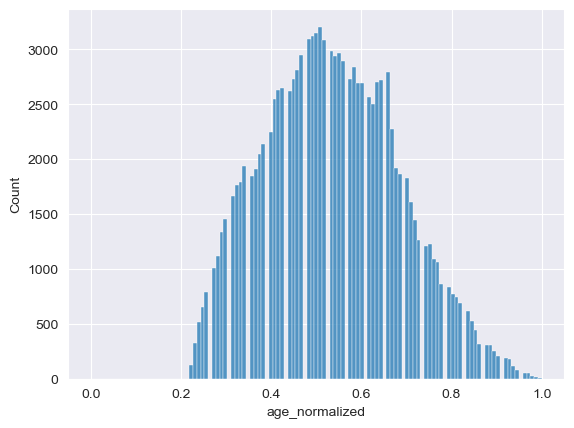

In [23]:
# feature scaling and visualization
scaler = MinMaxScaler(feature_range=(0,1))
df['age_normalized'] = scaler.fit_transform(df[['age']].values)
sns.histplot(df['age_normalized'])

#### 'Number Of Time 30-59Days Past Due Not Worse'

<Axes: xlabel='NumberOfTime30-59DaysPastDueNotWorse'>

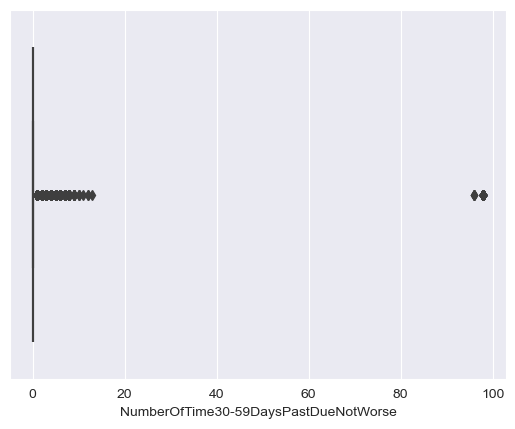

In [24]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x = df['NumberOfTime30-59DaysPastDueNotWorse'], orient = 'h')

In [25]:
Q1 = df['NumberOfTime30-59DaysPastDueNotWorse'].quantile(0.25)
Q3 = df['NumberOfTime30-59DaysPastDueNotWorse'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print(Q1, Q3, lower_thresh, upper_thresh)

0.0 0.0 0.0 0.0


In [26]:
# Because most of the data for this feature are 0, we just remove this feature.
df = df.drop('NumberOfTime30-59DaysPastDueNotWorse', axis = 1)

#### 'Debt Ratio'

<Axes: xlabel='DebtRatio'>

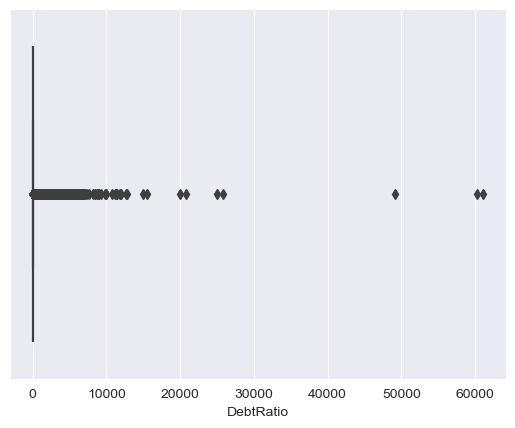

In [27]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x = df['DebtRatio'], orient = 'h')

In [28]:
Q1 = df['DebtRatio'].quantile(0.25)
Q3 = df['DebtRatio'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print(Q1, Q3, lower_thresh, upper_thresh)

0.143664373 0.48274188975 -0.36495190212499995 0.991358164875


In [29]:
# Drop outliers
df.drop(df[df['DebtRatio'] > 2.004].index, inplace=True)
df.shape

(116382, 13)

<Axes: xlabel='Debt_Ratio_normalized', ylabel='Count'>

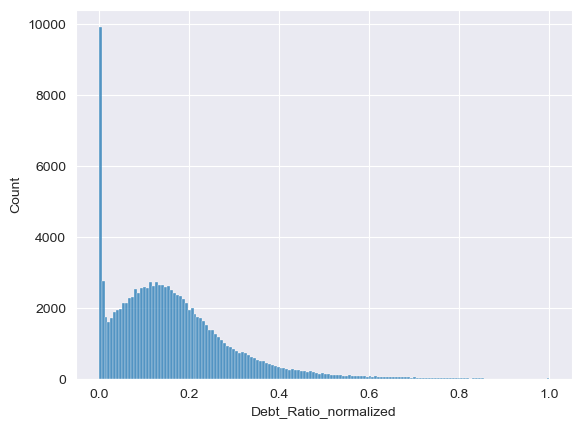

In [30]:
# feature scaling and visualization
scaler = MinMaxScaler(feature_range=(0,1))
df['Debt_Ratio_normalized'] = scaler.fit_transform(df[['DebtRatio']].values)
sns.histplot(df['Debt_Ratio_normalized'])

#### 'Monthly Income'

<Axes: xlabel='MonthlyIncome'>

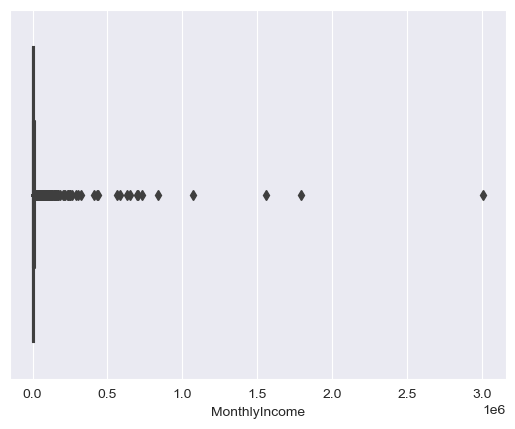

In [31]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x = df['MonthlyIncome'], orient = 'h')

In [32]:
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print(Q1, Q3, lower_thresh, upper_thresh)

3500.0 8333.0 -3749.5 15582.5


In [33]:
# Drop outliers
df.drop(df[df['MonthlyIncome'] > 15456.5].index, inplace=True)
df.shape

(111453, 14)

<Axes: xlabel='Monthly_Income_normalized', ylabel='Count'>

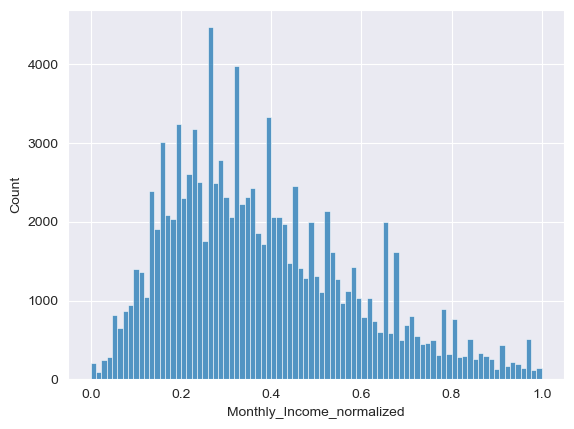

In [34]:
scaler = MinMaxScaler(feature_range=(0,1))
df['Monthly_Income_normalized'] = scaler.fit_transform(df[['MonthlyIncome']].values)
sns.histplot(df['Monthly_Income_normalized'])

#### 'Number Of Open Credit Lines And Loans'

<Axes: xlabel='NumberOfOpenCreditLinesAndLoans'>

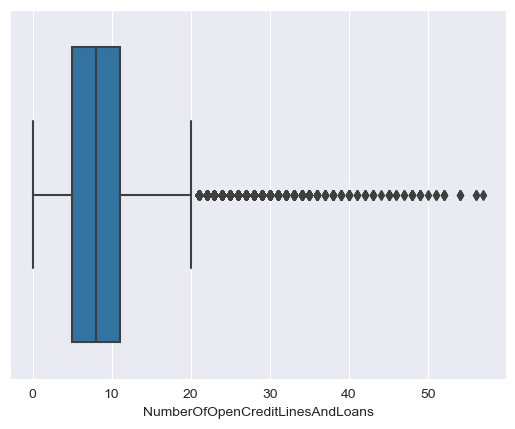

In [35]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x = df['NumberOfOpenCreditLinesAndLoans'], orient = 'h')

In [36]:
Q1 = df['NumberOfOpenCreditLinesAndLoans'].quantile(0.25)
Q3 = df['NumberOfOpenCreditLinesAndLoans'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print(Q1, Q3, lower_thresh, upper_thresh)

5.0 11.0 -4.0 20.0


In [37]:
# Drop outliers
df.drop(df[df['NumberOfOpenCreditLinesAndLoans'] > 20].index, inplace=True)
df.shape

(108541, 15)

<Axes: xlabel='Number_Of_Open_Credit_Lines_And_Loans_normalized', ylabel='Count'>

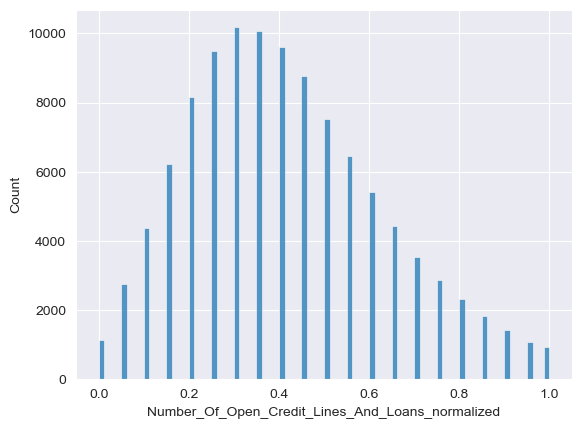

In [38]:
# feature scaling and visualization
scaler = MinMaxScaler(feature_range=(0,1))
df['Number_Of_Open_Credit_Lines_And_Loans_normalized'] = scaler.fit_transform(df[['NumberOfOpenCreditLinesAndLoans']].values)
sns.histplot(df['Number_Of_Open_Credit_Lines_And_Loans_normalized'])

#### 'Number Of Times 90Days Late'

<Axes: xlabel='NumberOfTimes90DaysLate'>

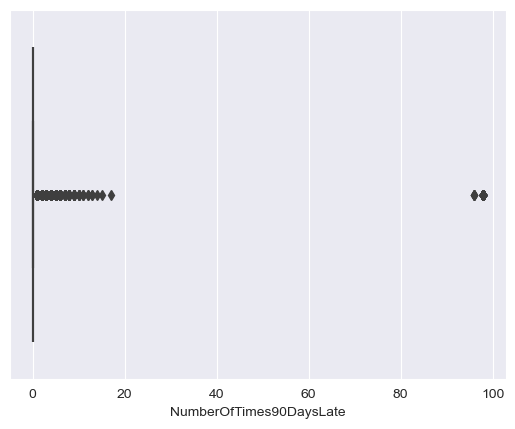

In [39]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x = df['NumberOfTimes90DaysLate'], orient = 'h')

In [40]:
Q1 = df['NumberOfTimes90DaysLate'].quantile(0.25)
Q3 = df['NumberOfTimes90DaysLate'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print(Q1, Q3, lower_thresh, upper_thresh)

0.0 0.0 0.0 0.0


In [41]:
# Because most of the data for this feature are 0, we just remove this feature.
df = df.drop('NumberOfTimes90DaysLate', axis = 1)

#### 'Number Real Estate Loans Or Lines'

<Axes: xlabel='NumberRealEstateLoansOrLines'>

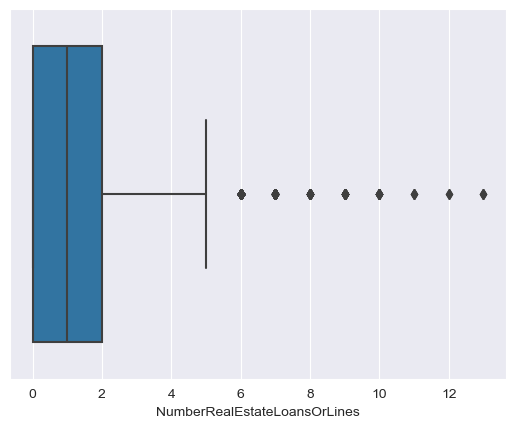

In [42]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x = df['NumberRealEstateLoansOrLines'], orient = 'h')

In [43]:
Q1 = df['NumberRealEstateLoansOrLines'].quantile(0.25)
Q3 = df['NumberRealEstateLoansOrLines'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print(Q1, Q3, lower_thresh, upper_thresh)

0.0 2.0 -3.0 5.0


In [44]:
# Drop outliers
df.drop(df[df['NumberRealEstateLoansOrLines'] > 5].index, inplace=True)

<Axes: xlabel='Number_Real_Estate_Loans_Or_Lines_normalized', ylabel='Count'>

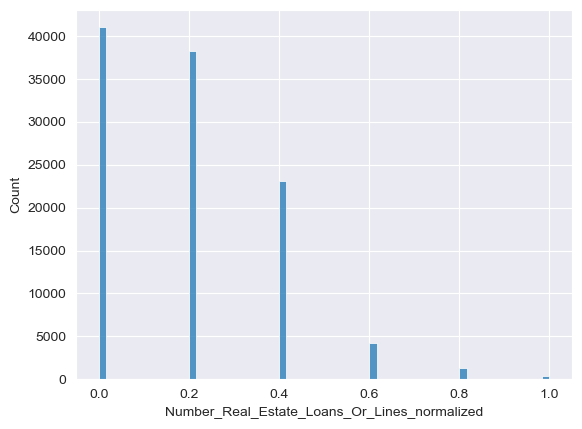

In [45]:
# feature scaling and visualization
scaler = MinMaxScaler(feature_range=(0,1))
df['Number_Real_Estate_Loans_Or_Lines_normalized'] = scaler.fit_transform(df[['NumberRealEstateLoansOrLines']].values)
sns.histplot(df['Number_Real_Estate_Loans_Or_Lines_normalized'])

#### 'Number Of Time 60-89Days Past Due Not Worse'

<Axes: xlabel='NumberOfTime60-89DaysPastDueNotWorse'>

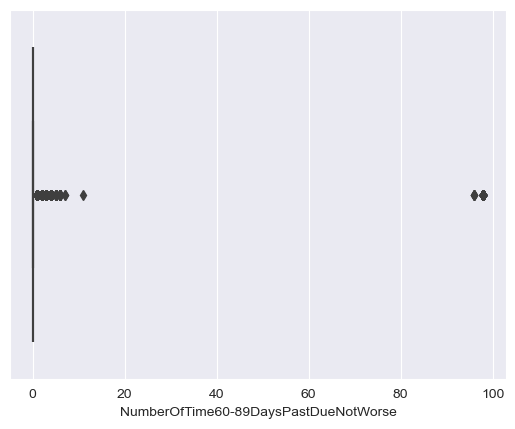

In [46]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x = df['NumberOfTime60-89DaysPastDueNotWorse'], orient='h')

In [47]:
Q1 = df['NumberOfTime60-89DaysPastDueNotWorse'].quantile(0.25)
Q3 = df['NumberOfTime60-89DaysPastDueNotWorse'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print(Q1, Q3, lower_thresh, upper_thresh)

0.0 0.0 0.0 0.0


In [48]:
# Because most of the data for this feature are 0, we just remove this feature.
df = df.drop('NumberOfTime60-89DaysPastDueNotWorse', axis = 1)

#### 'Number Of Dependents'

<Axes: xlabel='NumberOfDependents'>

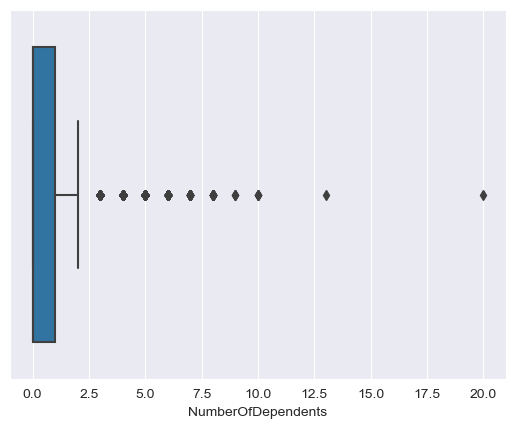

In [49]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x = df['NumberOfDependents'], orient = 'h')

In [50]:
Q1 = df['NumberOfDependents'].quantile(0.25)
Q3 = df['NumberOfDependents'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print(Q1, Q3, lower_thresh, upper_thresh)

0.0 1.0 -1.5 2.5


In [51]:
# Drop outliers
df.drop(df[df['NumberOfDependents'] > 2.5].index, inplace=True)
df.shape

(97521, 15)

<Axes: xlabel='Number_Of_Dependents_normalized', ylabel='Count'>

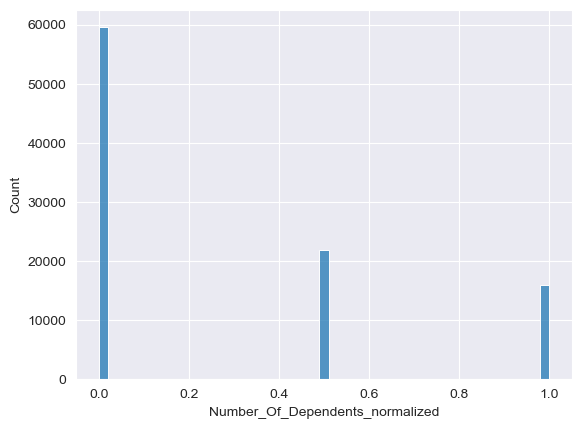

In [52]:
# feature scaling and visualization
scaler = MinMaxScaler(feature_range=(0,1))
df['Number_Of_Dependents_normalized'] = scaler.fit_transform(df[['NumberOfDependents']].values)
sns.histplot(df['Number_Of_Dependents_normalized'])

In [53]:
df.shape, df.columns

((97521, 16),
 Index(['Unnamed: 0', 'SeriousDlqin2yrs',
        'RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
        'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
        'NumberRealEstateLoansOrLines', 'NumberOfDependents',
        'Revolving_Utilization_Of_Unsecured_Lines_normalized', 'age_normalized',
        'Debt_Ratio_normalized', 'Monthly_Income_normalized',
        'Number_Of_Open_Credit_Lines_And_Loans_normalized',
        'Number_Real_Estate_Loans_Or_Lines_normalized',
        'Number_Of_Dependents_normalized'],
       dtype='object'))

In [54]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,Revolving_Utilization_Of_Unsecured_Lines_normalized,age_normalized,Debt_Ratio_normalized,Monthly_Income_normalized,Number_Of_Open_Credit_Lines_And_Loans_normalized,Number_Real_Estate_Loans_Or_Lines_normalized,Number_Of_Dependents_normalized
count,97521.000000,97521.000000,97521.000000,97521.000000,97521.000000,97521.000000,97521.000000,97521.000000,97521.000000,97521.000000,97521.000000,97521.000000,97521.000000,97521.000000,97521.000000,97521.000000
mean,75025.961475,0.066375,0.326241,51.693205,0.336029,5720.034280,8.171891,0.942351,0.553491,0.241794,0.538471,0.167687,0.370229,0.408595,0.188470,0.276746
std,43292.221649,0.248939,0.350364,15.012967,0.290208,3136.729021,4.349992,0.952232,0.758593,0.259672,0.156385,0.144821,0.203025,0.217500,0.190446,0.379297
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37685.000000,0.000000,0.031871,40.000000,0.130484,3333.000000,5.000000,0.000000,0.000000,0.023621,0.416667,0.065115,0.215728,0.250000,0.000000,0.000000
50%,75055.000000,0.000000,0.167552,51.000000,0.283669,5084.000000,8.000000,1.000000,0.000000,0.124181,0.531250,0.141558,0.329061,0.400000,0.200000,0.000000
75%,112473.000000,0.000000,0.570215,62.000000,0.460839,7596.000000,11.000000,2.000000,1.000000,0.422614,0.645833,0.229970,0.491650,0.550000,0.400000,0.500000
max,150000.000000,1.000000,1.349256,96.000000,2.003911,15450.000000,20.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# Because we have finished normalization, we will drop original features.
columns_to_drop = ['Unnamed: 0',
    'RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
    'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
    'NumberRealEstateLoansOrLines', 'NumberOfDependents'
]

# Dropping the columns from the train DataFrame
df = df.drop(columns=columns_to_drop)

## Data Preparation for Model Training
<a id="split"></a>

**Class distribution check**

In [56]:
print('potential credit risk:', round(df['SeriousDlqin2yrs'].value_counts()[1]/len(df),3))
print('No credit risk:', round(df['SeriousDlqin2yrs'].value_counts()[0]/len(df) ,3))

potential credit risk: 0.066
No credit risk: 0.934


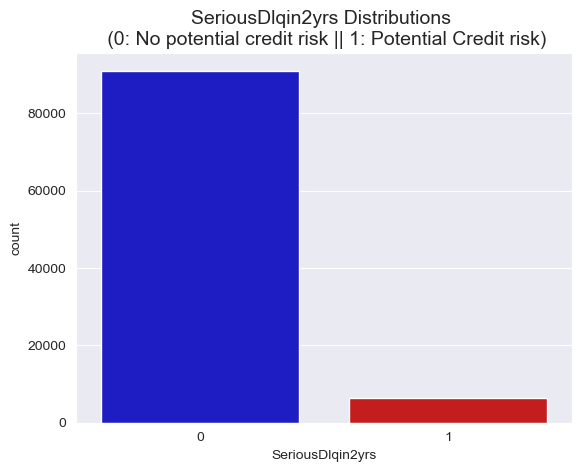

In [57]:
# visualize the distribution
colors = ["#0101DF", "#DF0101"]
sns.countplot(x = 'SeriousDlqin2yrs', data = df, palette = colors)
plt.title('SeriousDlqin2yrs Distributions \n (0: No potential credit risk || 1: Potential Credit risk)', fontsize = 14);

The dataset is imbalanced. If we use this dataset to train our predictive models, they will not function well. They will overfit the dataset because it will assume that most cases do not have potential credit risk. Thus, we will balance our training data.

**Split data into training and testing sets**

In [58]:
# randomly sample 80% as training and 20% as testing
ss = ShuffleSplit(n_splits = 1, test_size = .2, random_state = 0)
train_idx, test_idx = next(ss.split(np.arange(df.shape[0])))

df_train = df.iloc[train_idx]
df_test = df.iloc[test_idx]

In [59]:
# Verify that both the train and test dataset have similar label distributions
ct_train = Counter(df_train['SeriousDlqin2yrs'])
ct_test = Counter(df_test['SeriousDlqin2yrs'])

print("Training data: %.3f credit risk, %.3f no credit risk" % (ct_train[0]/df_train.shape[0], ct_train[1]/df_train.shape[0]))
print("Testing data: %.3f credit risk, %.3f no credit risk" % (ct_test[0]/df_test.shape[0], ct_test[1]/df_test.shape[0]))

Training data: 0.934 credit risk, 0.066 no credit risk
Testing data: 0.933 credit risk, 0.067 no credit risk


**Create a balanced training dataset**

In [60]:
# shuffle the data before creating the subsamples
df_shuffled = df_train.sample(frac=1)

df_credit_risk = df_shuffled.loc[df['SeriousDlqin2yrs'] == 1]
df_no_credit_risk = df_shuffled.loc[df['SeriousDlqin2yrs'] == 0][:df_credit_risk.shape[0]]

df_conct = pd.concat([df_credit_risk, df_no_credit_risk])

# Shuffle the dataframe
df_train_balanced = df_conct.sample(frac=1, random_state=42)

In [61]:
# the resulting dataframe has a balanced distribution of potential credit risk and no potential credit risk
Counter(df_train_balanced['SeriousDlqin2yrs'])

Counter({0: 5171, 1: 5171})

In [62]:
# create feature matrix
X_train = df_train_balanced.drop('SeriousDlqin2yrs', axis=1)
y_train = df_train_balanced['SeriousDlqin2yrs']

X_test = df_test.drop('SeriousDlqin2yrs', axis=1)
y_test = df_test['SeriousDlqin2yrs']

**Correlation matrix of the balanced dataset**

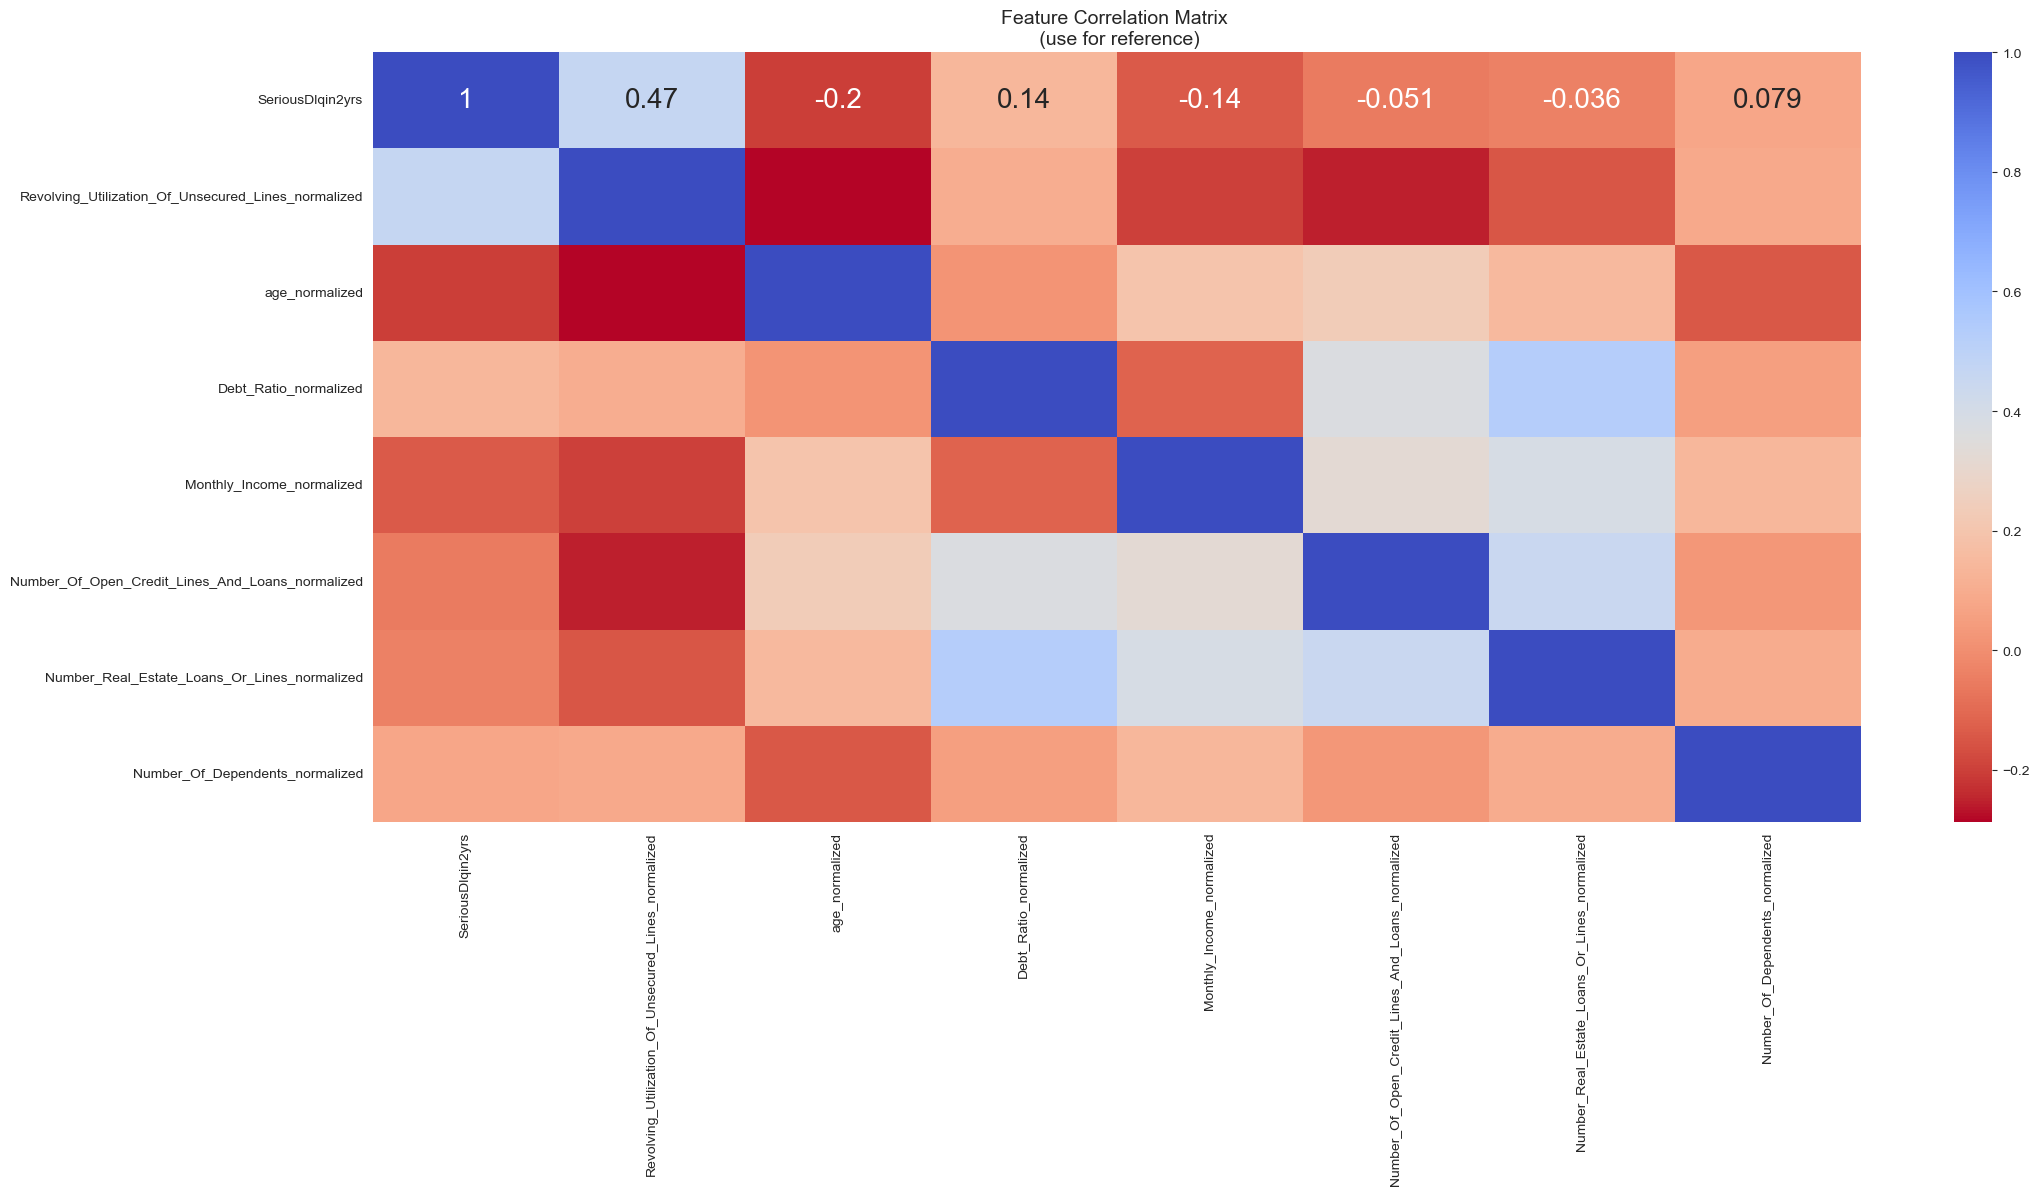

In [63]:
plt.figure(figsize=(24,10))
sub_sample_corr = df_train_balanced.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, annot= True)
plt.title('Feature Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

**Observations from correlation matrix:**
    
- Revolving Utilization Of UnsecuredLines, Debt Ratio, and Number Of Dependents are highly correlated with credit risk (SeriousDlqin2yrs).
- age, Monthly Income, Number Of Open Credit Lines And Loans, and Number Real Estate Loans Or Lines are highly correlated with non-credit risk (SeriousDlqin2yrs).

We will use boxplots to have a better understanding of the distribution of these features in credit risk and non-credit risks.

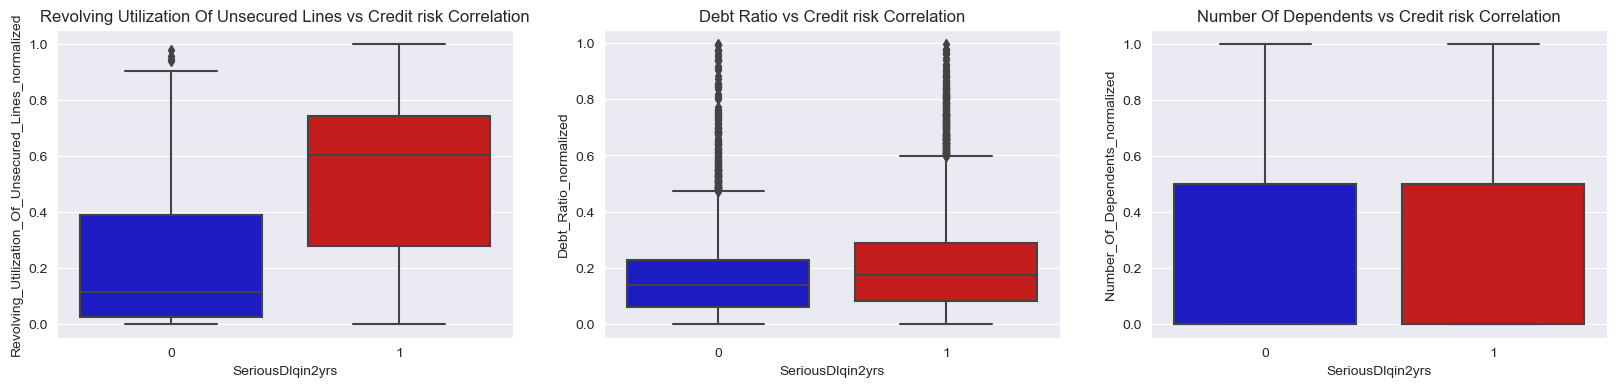

In [64]:
# Positive correlations (The higher the feature value, the more likely it will be a credit risk)

f, axes = plt.subplots(ncols = 3, figsize=(20,4))

sns.boxplot(x = "SeriousDlqin2yrs", y = "Revolving_Utilization_Of_Unsecured_Lines_normalized", data = df_train_balanced, palette = colors, ax = axes[0])
axes[0].set_title('Revolving Utilization Of Unsecured Lines vs Credit risk Correlation')

sns.boxplot(x = "SeriousDlqin2yrs", y = "Debt_Ratio_normalized", data = df_train_balanced, palette = colors, ax = axes[1])
axes[1].set_title('Debt Ratio vs Credit risk Correlation')

sns.boxplot(x = "SeriousDlqin2yrs", y = "Number_Of_Dependents_normalized", data = df_train_balanced, palette = colors, ax = axes[2])
axes[2].set_title('Number Of Dependents vs Credit risk Correlation')

plt.show()

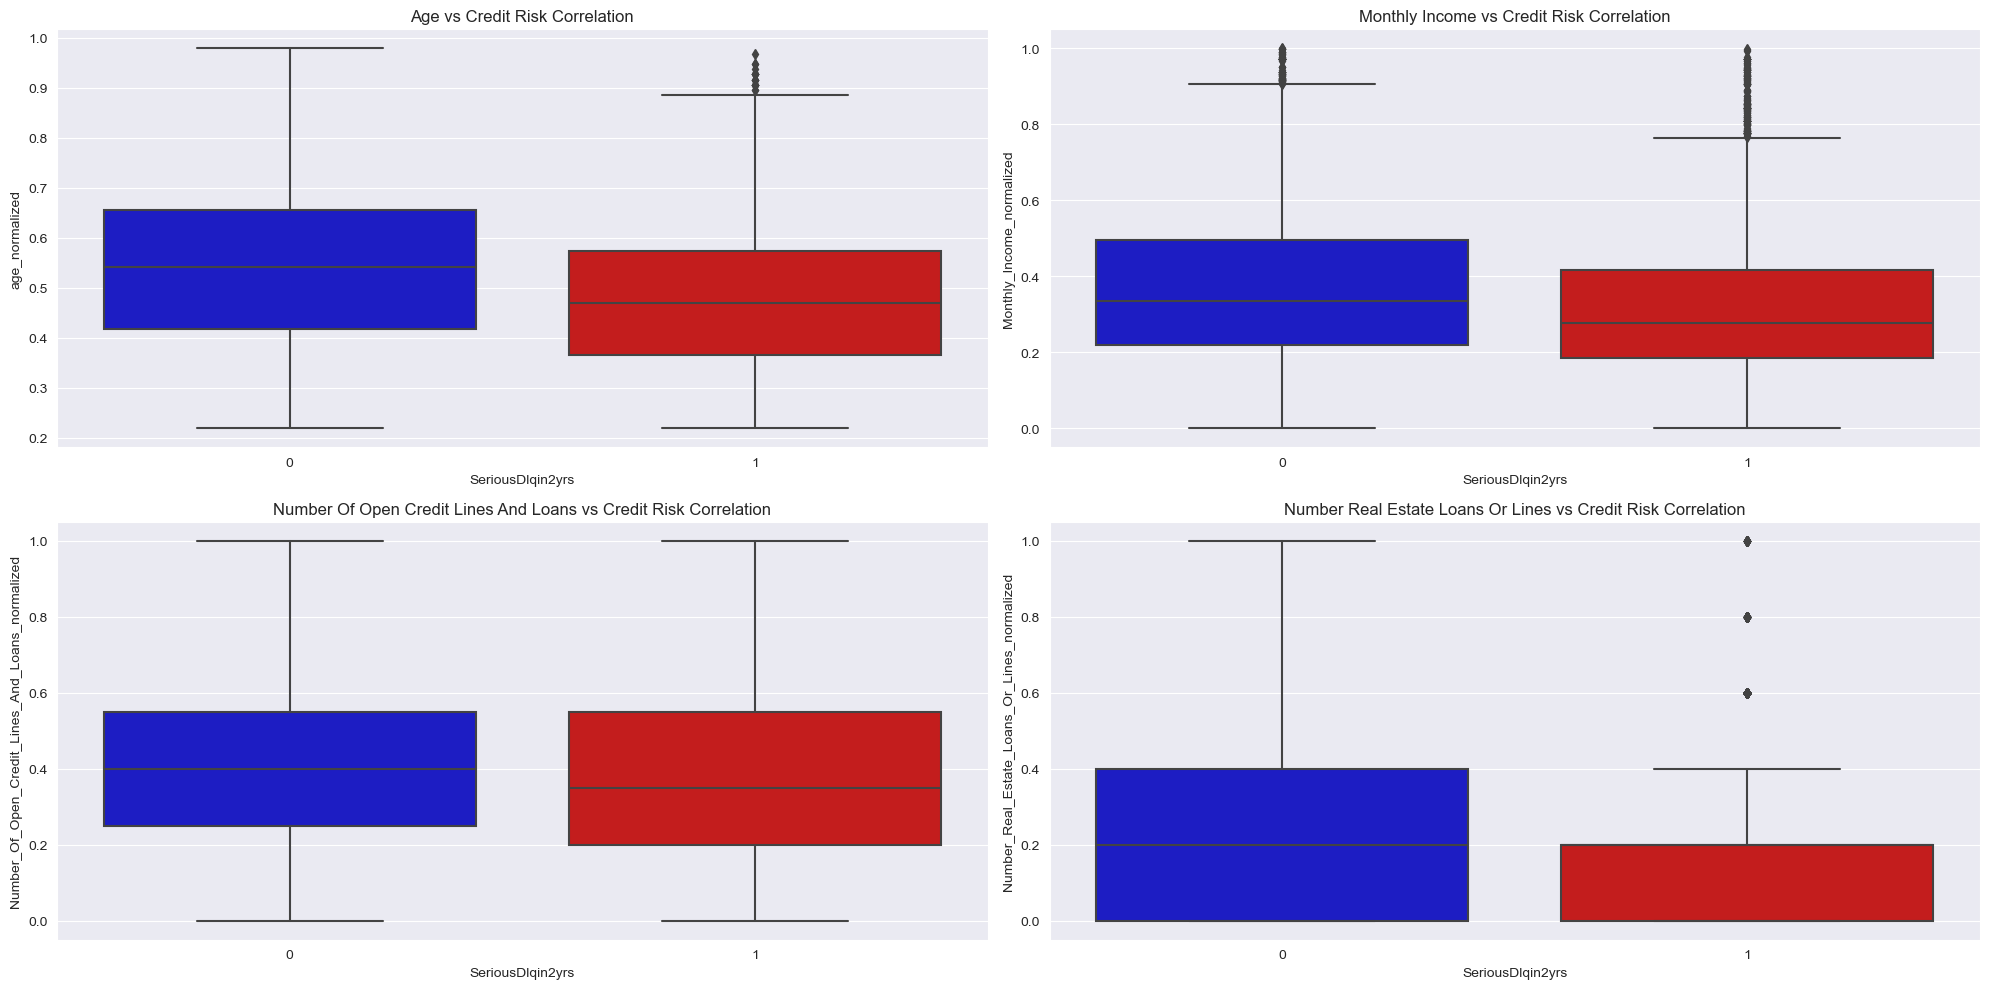

In [65]:
# Negative Correlations (The lower the feature value, the more likely it will be a credit risk)

f, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

sns.boxplot(x="SeriousDlqin2yrs", y="age_normalized", data=df_train_balanced, palette=colors, ax=axes[0,0])
axes[0,0].set_title('Age vs Credit Risk Correlation')

sns.boxplot(x="SeriousDlqin2yrs", y="Monthly_Income_normalized", data=df_train_balanced, palette=colors, ax=axes[0,1])
axes[0,1].set_title('Monthly Income vs Credit Risk Correlation')

sns.boxplot(x="SeriousDlqin2yrs", y="Number_Of_Open_Credit_Lines_And_Loans_normalized", data=df_train_balanced, palette=colors, ax=axes[1,0])
axes[1,0].set_title('Number Of Open Credit Lines And Loans vs Credit Risk Correlation')

sns.boxplot(x="SeriousDlqin2yrs", y="Number_Real_Estate_Loans_Or_Lines_normalized", data=df_train_balanced, palette=colors, ax=axes[1,1])
axes[1,1].set_title('Number Real Estate Loans Or Lines vs Credit Risk Correlation')

plt.tight_layout()
plt.show()

## Unsupervised learning
<a id="unsupervised"></a>
In this section, we apply two dimension reduction techniques (PCA and T-SNE) to reduce the original feature representation to lower dimension. We will apply PCA to reduce 8 dimension to lower dimension (5), and we apply T-SNE to reduce 8 dimension to 2 dimension. Then, we will visualize the training data in a 2D space and check if credit risk automatically fall into the same cluster in the 2D space.

**Dimension reduction**

**PCA**

In [66]:
# decompose the original feature space into 5 components
pca = decomposition.PCA(n_components = 5)
pca.fit(X_train)
X_pca = pca.transform(X_train)

In [67]:
X_train.values[0], X_pca[0] 

(array([0.00803728, 0.5       , 0.00302871, 0.18122977, 0.3       ,
        0.        , 0.        ]),
 array([-0.376796  ,  0.07742501, -0.39398676,  0.09378523, -0.04646976]))

In [68]:
pca.explained_variance_ratio_ 

array([0.37075135, 0.26115   , 0.15663377, 0.08395565, 0.06151674])

In [69]:
# Over 90% is ideal for the number of components, which is why we set n_components = 5.
0.36823103 + 0.26340596 + 0.15543429 + 0.08452599 + 0.06261337

0.9342106400000001

Text(0.5, 1.0, 'Variance explained by each PC')

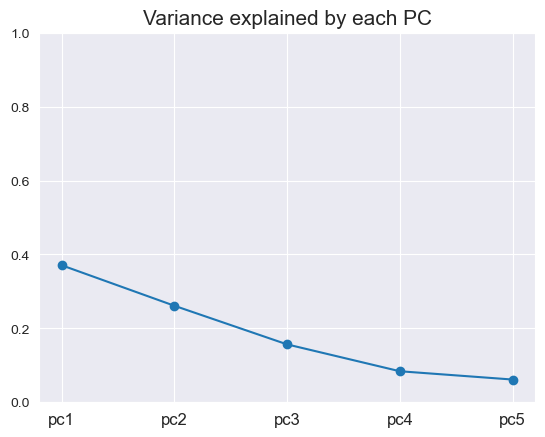

In [70]:
# Visualize the PCA.
plt.plot(pca.explained_variance_ratio_,'o-')
plt.xticks([0, 1, 2, 3, 4],['pc1', 'pc2', 'pc3', 'pc4', 'pc5'], fontsize=12)
plt.ylim(0,1)
plt.title('Variance explained by each PC', fontsize=15)

In [71]:
pca.components_ # n_components, n_features


array([[ 0.13186278, -0.0695114 ,  0.03943274,  0.08354225,  0.02460488,
         0.072279  ,  0.98153781],
       [-0.73505391,  0.18673362,  0.08799454,  0.30714801,  0.45970919,
         0.33053728,  0.0464319 ],
       [ 0.60088567,  0.00809016,  0.40115027,  0.14399126,  0.46526991,
         0.46569919, -0.15448013],
       [-0.21740814, -0.09822762,  0.46881534, -0.83593266,  0.13865003,
         0.02139294,  0.06951479],
       [-0.13045465, -0.12660512,  0.24250897,  0.08050167, -0.70791749,
         0.6317905 , -0.03681309]])

In [72]:
np.dot(X_train.values[0], pca.components_[1])

0.28130260789117023

**Data visualization and clustering in reduced dimensions**

- Visualize the data with the first PC

Text(0.5, 0, 'PC1')

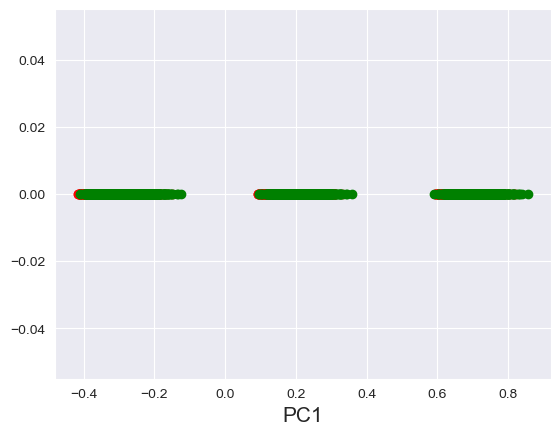

In [73]:
plt.plot(X_pca[:,0][np.where(y_train==0)], np.zeros(len(np.where(y_train ==0)[0])), 'o',color='red')
plt.plot(X_pca[:,0][np.where(y_train==1)], np.zeros(len(np.where(y_train ==1)[0])), 'o',color='green')
plt.plot(X_pca[:,0][np.where(y_train==2)], np.zeros(len(np.where(y_train ==2)[0])), 'o',color='blue')
plt.xlabel('PC1', fontsize=15)

- Visualize the data with the top-2 PCs

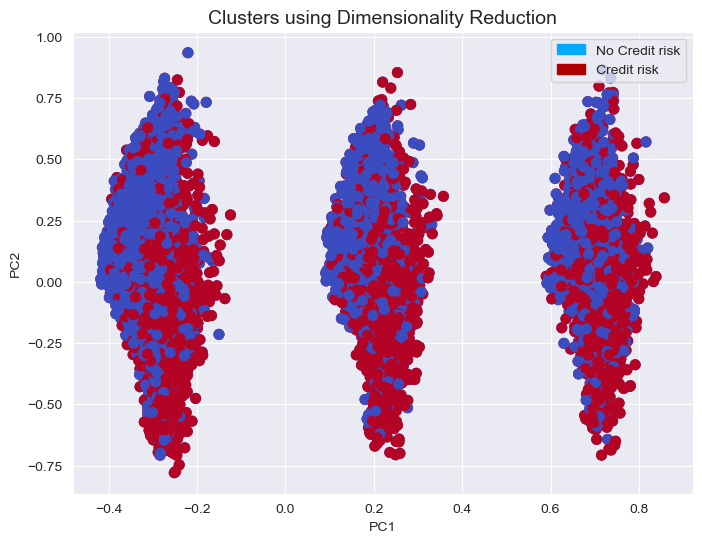

In [226]:
plt.figure(figsize=(8, 6))

plt.title('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#00AAFF', label='No Credit risk')
red_patch = mpatches.Patch(color='#AF0000', label='Credit risk')

plt.scatter(X_pca[:,0], X_pca[:,1], c=(y_train == 0), cmap='coolwarm', label='No Credit risk', linewidths=2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=(y_train == 1), cmap='coolwarm', label='Credit risk', linewidths=2)
plt.grid(True)
plt.legend(handles=[blue_patch, red_patch])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


**T-SNE**

In [232]:
tsne = TSNE(n_components=2, random_state = 42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_train.values)

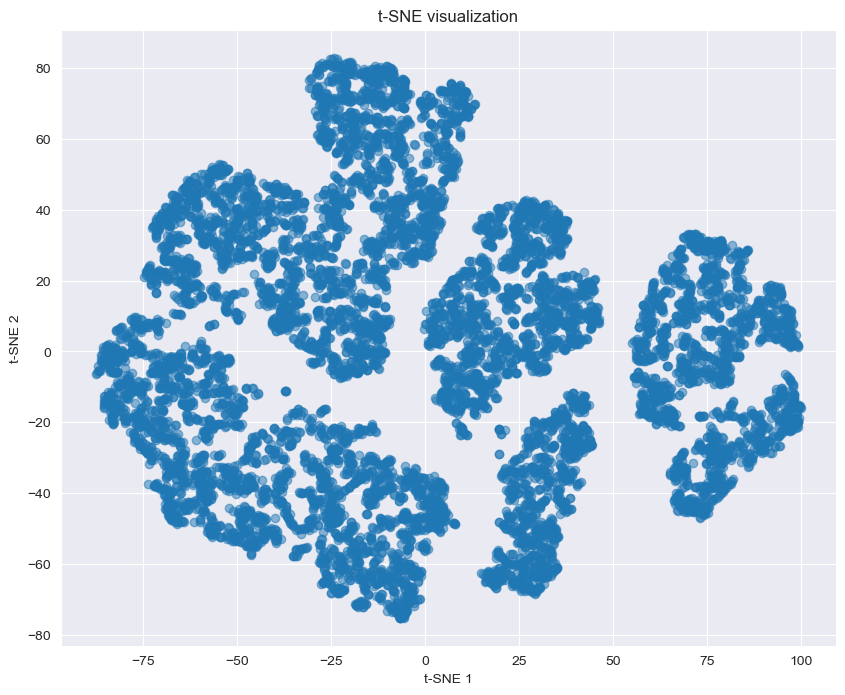

In [233]:
# Plotting the t-SNE output
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.title('t-SNE visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

Each axis (t-SNE 1 and t-SNE 2) represents a synthesized dimension that has no inherent meaning outside of its ability to help separate data points based on their similarity. Unlike PCA, where each component has a direct correlation with variance and the original features, t-SNE dimensions do not correspond directly to specific features. Instead, they are complex functions of the distances between points in the high-dimensional space (i.e., similar items are kept close together).


The various "clusters" or dense regions in the plot above suggest groups of data points that are similar to each other in the high-dimensional space from which they were reduced. These might represent underlying patterns or subgroups within the data. The gaps or less dense areas between clusters indicate dissimilarities or transitions between different groups of data points.

## Supervised learning: classification
<a id="supervised"></a>
In this section, we will train four different models: 
- a DecisionTree classifier
- a RandomForest classifier
- a LogisticRegression classifier
- an Ensemble learning

With these models we will predict Credit risk VS No credit risk, and then evaluate model performance using multiple metrics from confusion matrix, classification report (precision/recall/f1)/ AUC-ROC.

### 1) A DecisionTree Classifier

**Model training**

In [130]:
# Creating a Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42, criterion='entropy')

In [131]:
# Next, we fit the DecisionTreeClassifier on the training set.
dt_clf = dt_clf.fit(X_train, y_train)

In [132]:
# Next, we evaluate the DecisionTreeClassifier performance on the testing set.
np.round(dt_clf.score(X_test,y_test), 3)

0.622

In [133]:
# number of leaves in the fitted tree
dt_clf.get_n_leaves()

2355

**GridSearchCV**

In [137]:
# Define Parameter Grid
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

In [138]:
# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_clf, param_grid=param_grid_dt, cv=5, scoring='accuracy')

In [139]:
# Fit GridSearchCV
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [140]:
# Best estimator and parameters
best_tree_clf = grid_search_dt.best_estimator_
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best Parameters:", best_params_dt)
print("Best Score:", best_score_dt)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score: 0.6858443655210518


In [141]:
dt_clf = grid_search_dt.fit(X_train, y_train)
np.round(dt_clf.score(X_test,y_test), 3)

0.709

After GridSearchCV, the performance improved.

**Decision Tree model visualization**

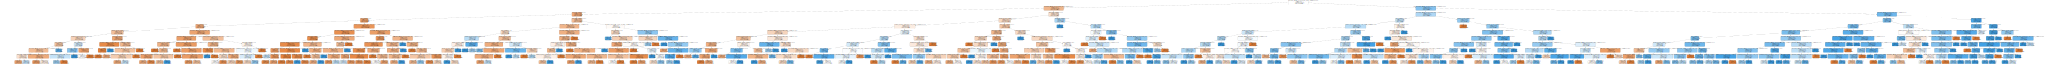

In [89]:
# Visualize the fitted DecisionTreeClassifier
dot_data = export_graphviz(
    grid_search_dt.best_estimator_,
    out_file = None,
    feature_names = X_train.columns,
    class_names = ["No credit risk", "Credit risk"],
    filled = True,
    rounded = True,
    special_characters = True
)
graph = graphviz.Source(dot_data)  
graph 

**Model evaluation**

In [90]:
y_preds_dt = dt_clf.predict(X_test)

- Classification report

In [91]:
report = classification_report(y_test, y_preds_dt, target_names = ['No credit risk', 'Credit risk'])
print(report)

                precision    recall  f1-score   support

No credit risk       0.97      0.71      0.82     18203
   Credit risk       0.15      0.69      0.24      1302

      accuracy                           0.71     19505
     macro avg       0.56      0.70      0.53     19505
  weighted avg       0.91      0.71      0.78     19505



- Confusion matrix

In [92]:
# Predict probabilities for the positive class (class 1)
confusion_matrix(y_test, y_preds_dt, labels = [0,1])

array([[12932,  5271],
       [  406,   896]])

In [235]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_dt, labels = [1,0]).ravel()
tn, fp, fn, tp 

(896, 406, 5271, 12932)

- AUC-ROC


In [94]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds_dt, pos_label = 1)
thresholds
fpr
tpr

roc_score = roc_auc_score(y_test, y_preds_dt)
roc_score

0.699302194663647

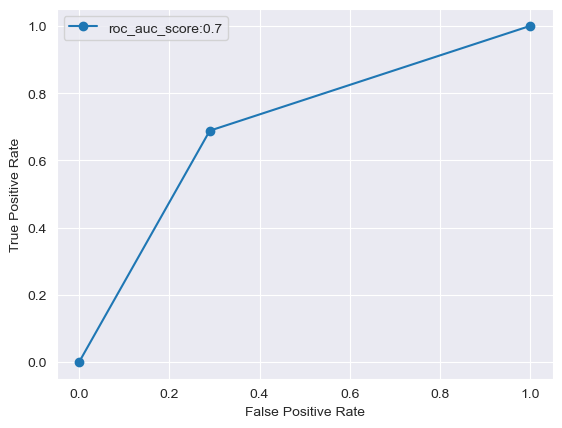

In [95]:
plt.plot(fpr, tpr, 'o-', label = "roc_auc_score:" + str(roc_score.round(2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

**Model interpretation**

In [96]:
# get feature importance
features = df_train_balanced.drop('SeriousDlqin2yrs', axis = 1).columns
importance = np.round(best_tree_clf.feature_importances_,2)

# Create pandas dataframe of feature and correpsonding importance
df_importance = pd.DataFrame([features, importance]).T
df_importance.rename(columns = {0: 'feature', 1: 'importance'}, inplace = True)

# Sort descendingly based on importance
df_importance.sort_values(['importance'], ascending = False, inplace = True)

# Show dataframe
df_importance[df_importance['importance'] > 0].reset_index(drop = True)

,feature,importance
0,Revolving_Utilization_Of_Unsecured_Lines_norma...,0.62
1,Debt_Ratio_normalized,0.12
2,age_normalized,0.09
3,Monthly_Income_normalized,0.07
4,Number_Of_Open_Credit_Lines_And_Loans_normalized,0.06
5,Number_Real_Estate_Loans_Or_Lines_normalized,0.02
6,Number_Of_Dependents_normalized,0.01


**Error Analysis**

In [97]:
data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_preds_dt
})

errors = data[data['Actual'] != data['Predicted']]

error_indices = errors.index.tolist()

print(errors)
print("Indices of misclassified samples:", error_indices[:5])

        Actual  Predicted
60318        0          1
45122        0          1
100566       0          1
13768        0          1
146808       0          1
...        ...        ...
116501       1          0
24185        1          0
53341        0          1
32116        1          0
61857        0          1

[5677 rows x 2 columns]
Indices of misclassified samples: [60318, 45122, 100566, 13768, 146808]


In [236]:
fp, fn

(406, 5271)

The error analysis and confusion matrix tells us a lot of false negatives. It means that the model often fails to detect the positive class (1). The model should have predicted a potential credit risk, but failed, which is significantly critical. 

Because we have already balanced the dataset between 0 and 1, we should test if this model creates these errors or they stem from somewhere else. We will try three more models. We will determine this problem after exploring them.



#### Summary- A DecisionTree Classifier 
- Accuracy score: 0.709
- ROC score: 0.699302194663647
- number of errors: 5677
- Top two important features: 
    
    - Revolving Utilization Of Unsecured Lines (.62)
    
    - Debt Ratio (.12)

### 2) A RandomForest Classifier

**Model training**

In [98]:
rf_clf = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)

In [99]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

In [100]:
np.round(rf_clf.score(X_test,y_test), 3)

0.712

**GridSearchCV**

In [101]:
param_grid_rf = {
    'n_estimators' : [100, 200, 500, 1000],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
    }

In [102]:
grid_search_rf = GridSearchCV(estimator= rf_clf, param_grid= param_grid_rf, cv = 5, scoring = 'roc_auc', verbose = 1)

In [103]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=1000,
                                              random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='roc_auc', verbose=1)

In [142]:
best_rf_clf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters:", best_params_rf)
print("Best Score:", best_score_rf)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
Best Score: 0.7838384973416115


In [143]:
rf_clf = grid_search_rf.fit(X_train, y_train)
np.round(rf_clf.score(X_test,y_test), 3)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


0.794

**Model evaluation**

In [144]:
y_preds_rf = rf_clf.predict(X_test)

- classification report

In [145]:
print(classification_report(y_test, y_preds_rf))

              precision    recall  f1-score   support

           0       0.97      0.72      0.83     18203
           1       0.16      0.74      0.26      1302

    accuracy                           0.72     19505
   macro avg       0.57      0.73      0.55     19505
weighted avg       0.92      0.72      0.79     19505



- Confusion matrix

In [146]:
confusion_matrix(y_test, y_preds_rf,labels=[0,1])

array([[13143,  5060],
       [  340,   962]])

In [147]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_rf,labels=[1,0]).ravel()
tn, fp, fn, tp 

(962, 340, 5060, 13143)

This model also has a lot of false negative.

- AUC-ROC

In [148]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds_rf, pos_label=1)
thresholds
fpr
tpr

roc_score = roc_auc_score(y_test, y_preds_rf)
roc_score


0.7304435647370966

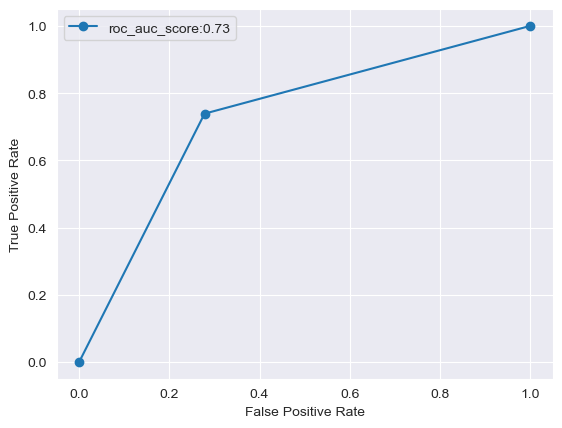

In [149]:
plt.plot(fpr,tpr,'o-',label="roc_auc_score:"+str(roc_score.round(2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

**Model interpretation**

In [150]:
# get feature importance
features = df_train_balanced.drop('SeriousDlqin2yrs', axis=1).columns
importance = np.round(best_rf_clf.feature_importances_,2)

# Create pandas dataframe of feature and correpsonding importance
df_importance = pd.DataFrame([features, importance]).T
df_importance.rename(columns={0: 'feature', 1:'importance'}, inplace=True)

# Sort descendingly based on importance
df_importance.sort_values(['importance'], ascending=False, inplace=True)

# Show dataframe
df_importance[df_importance['importance']>0].reset_index(drop=True)

,feature,importance
0,Revolving_Utilization_Of_Unsecured_Lines_norma...,0.51
1,Debt_Ratio_normalized,0.13
2,age_normalized,0.12
3,Monthly_Income_normalized,0.11
4,Number_Of_Open_Credit_Lines_And_Loans_normalized,0.07
5,Number_Real_Estate_Loans_Or_Lines_normalized,0.03
6,Number_Of_Dependents_normalized,0.02


**Error Analysis**

In [151]:
data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_preds_rf
})

errors = data[data['Actual'] != data['Predicted']]

error_indices = errors.index.tolist()

print(errors)
print("Indices of misclassified samples:", error_indices[:5])

        Actual  Predicted
60318        0          1
149808       0          1
23455        0          1
75225        0          1
45122        0          1
...        ...        ...
116501       1          0
24185        1          0
53341        0          1
32116        1          0
61857        0          1

[5400 rows x 2 columns]
Indices of misclassified samples: [60318, 149808, 23455, 75225, 45122]


#### Summary- A RandomForest Classifier 
- Accuracy score: 0.794
- ROC score: 0.7304435647370966
- number of errors: 5400
- Top two important features: 

    - Revolving Utilization Of Unsecured Lines (.51)
    
    - Debt Ratio (.13)

### 3) A LogisticRegression Clssifier

**Model Training**

In [169]:
lr_clf = LogisticRegression(penalty = 'l1', solver = 'liblinear', random_state = 42, max_iter = 2000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000, penalty='l1', random_state=42,
                   solver='liblinear')

In [170]:
np.round(lr_clf.score(X_test, y_test), 3)

0.725

**GridSearchCV**

In [171]:
lr_clf = LogisticRegression(random_state=42)
param_grid_lr = {'penalty':('l1', 'l2'), 
              'C':[0.1, 1, 10],
              'solver': ['liblinear']} 

In [172]:
grid_search_lr = GridSearchCV(estimator = lr_clf, param_grid = param_grid_lr, cv = 5, scoring = 'accuracy')

In [173]:
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'penalty': ('l1', 'l2'),
                         'solver': ['liblinear']},
             scoring='accuracy')

In [174]:
best_lr_clf = grid_search_lr.best_estimator_ 
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print("Best Parameters:", best_params_lr)
print("Best Score:", best_score_lr)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.7174621122529969


In [175]:
lr_clf = grid_search_lr.fit(X_train, y_train)
np.round(lr_clf.score(X_test,y_test), 3)

0.726

**Model evaluation**

In [176]:
y_preds_lr = lr_clf.predict(X_test)

- classification report

In [177]:
print(classification_report(y_test, y_preds_lr))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     18203
           1       0.16      0.74      0.26      1302

    accuracy                           0.73     19505
   macro avg       0.57      0.73      0.55     19505
weighted avg       0.92      0.73      0.79     19505



- Confusion matrix

In [178]:
confusion_matrix(y_test, y_preds_lr, labels = [0,1])

array([[13206,  4997],
       [  342,   960]])

In [179]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_lr, labels = [1,0]).ravel()
tn, fp, fn, tp 

(960, 342, 4997, 13206)

This model also has a lot of false negative.

- AUC-ROC

In [180]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds_lr, pos_label=1)
thresholds
fpr
tpr

roc_score = roc_auc_score(y_test, y_preds_lr)
roc_score


0.7314059995681068

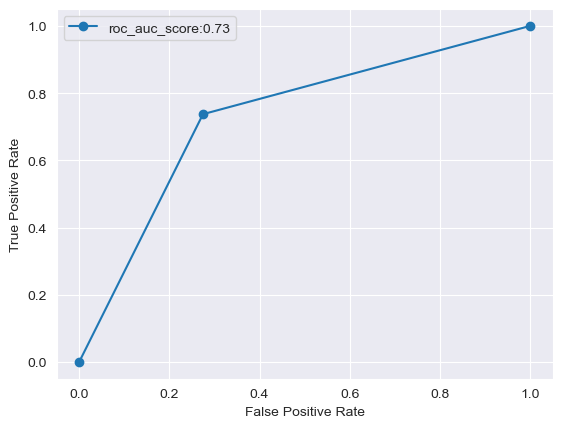

In [181]:
plt.plot(fpr,tpr,'o-',label = "roc_auc_score:" + str(roc_score.round(2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

**Model interpretation**

In [186]:
# get feature importance
features = df_train_balanced.drop('SeriousDlqin2yrs', axis=1).columns
importance = np.round(best_lr_clf.coef_[0], 2)

# Create pandas dataframe of feature and correpsonding importance
df_importance = pd.DataFrame([features, importance]).T
df_importance.rename(columns={0: 'feature', 1:'importance'}, inplace=True)

# Sort descendingly based on importance
df_importance.sort_values(['importance'], ascending=False, inplace=True)

# Show dataframe
df_importance[df_importance['importance'] != 0].reset_index(drop=True)

,feature,importance
0,Revolving_Utilization_Of_Unsecured_Lines_norma...,3.34
1,Debt_Ratio_normalized,0.78
2,Number_Of_Open_Credit_Lines_And_Loans_normalized,0.68
3,Number_Of_Dependents_normalized,0.17
4,Monthly_Income_normalized,-0.61
5,age_normalized,-1.3


**Error Analysis**

In [187]:
data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_preds_lr
})

errors = data[data['Actual'] != data['Predicted']]

error_indices = errors.index.tolist()

print(errors)
print("Indices of misclassified samples:", error_indices[:5])

        Actual  Predicted
60318        0          1
149808       0          1
13618        0          1
75225        0          1
45122        0          1
...        ...        ...
116501       1          0
24185        1          0
53341        0          1
32116        1          0
61857        0          1

[5339 rows x 2 columns]
Indices of misclassified samples: [60318, 149808, 13618, 75225, 45122]


#### Summary- A LogisticRegression Classifier 
- Accuracy score: 0.726
- ROC score: 0.7314059995681068
- number of errors: 5339
- Top two important features: 

    - Revolving Utilization Of Unsecured Lines (3.34)
    
    - Debt Ratio (.78)

### 4) An Ensemble learning (Bagging)

**Model training**

In [196]:
bagging_clf = BaggingClassifier(estimator = SVC(), n_estimators = 10, random_state = 0, 
                        max_samples = 0.6, max_features = 0.8, bootstrap = True) 
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(), max_features=0.8, max_samples=0.6,
                  random_state=0)

In [197]:
bagging_clf.score(X_test, y_test)

0.7291976416303512

**GridSearchCV**

In [202]:
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.8, 1.0],
    'bootstrap': [True, False],
    'base_estimator__C': [0.1, 1, 10],
}

In [203]:
svc = SVC()
bagging_clf = BaggingClassifier(base_estimator = svc)

In [204]:
grid_search_bagging = GridSearchCV(estimator = bagging_clf, param_grid = param_grid, cv = 5, scoring = 'accuracy')

In [205]:
grid_search_bagging.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(base_estimator=SVC()),
             param_grid={'base_estimator__C': [0.1, 1, 10],
                         'bootstrap': [True, False],
                         'max_features': [0.5, 0.8, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 20, 30]},
             scoring='accuracy')

In [211]:
best_bagging_clf = grid_search_bagging.best_estimator_
best_params_bagging = grid_search_bagging.best_params_
best_score_bagging = grid_search_bagging.best_score_

print("Best parameters found: ", best_params_bagging)
print("Best scores: ", best_score_bagging)

Best parameters found:  {'base_estimator__C': 1, 'bootstrap': True, 'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 20}
Best scores:  0.7187193188946528


**Model evaluation**

In [215]:
y_preds_bagging = best_bagging_clf.predict(X_test)

- classification report

In [216]:
print(classification_report(y_test, y_preds_bagging))

              precision    recall  f1-score   support

           0       0.97      0.72      0.83     18203
           1       0.16      0.74      0.26      1302

    accuracy                           0.72     19505
   macro avg       0.57      0.73      0.55     19505
weighted avg       0.92      0.72      0.79     19505



- Confusion matrix

In [217]:
confusion_matrix(y_test, y_preds_bagging, labels = [0,1])

array([[13144,  5059],
       [  343,   959]])

In [218]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_bagging, labels = [1,0]).ravel()
tn, fp, fn, tp 

(959, 343, 5059, 13144)

This model also has a lot of false negative.

- AUC-ROC

In [219]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds_bagging, pos_label = 1)
thresholds
fpr
tpr

roc_score = roc_auc_score(y_test, y_preds_bagging)
roc_score


0.729318959004158

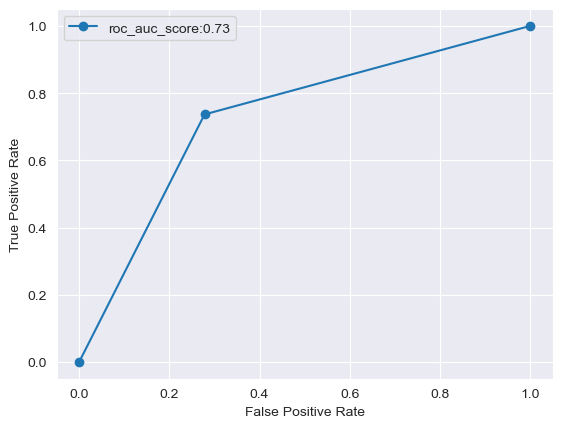

In [220]:
plt.plot(fpr,tpr,'o-',label = "roc_auc_score:" + str(roc_score.round(2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

**Error Analysis**

In [225]:
data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_preds_bagging
})

errors = data[data['Actual'] != data['Predicted']]

error_indices = errors.index.tolist()

print(errors)
print("Indices of misclassified samples:", error_indices[:5])

        Actual  Predicted
60318        0          1
149808       0          1
13618        0          1
75225        0          1
45122        0          1
...        ...        ...
116501       1          0
24185        1          0
53341        0          1
32116        1          0
61857        0          1

[5402 rows x 2 columns]
Indices of misclassified samples: [60318, 149808, 13618, 75225, 45122]


**Model interpretation**
- Note: Because it takes too long (8 Hrs to run gridserchcv) to run the code for model interpretation, I left the last two codes not run.

In [ ]:
# Get the feature names and compute permutation feature importance
features = df_train_balanced.drop('SeriousDlqin2yrs', axis=1).columns 
perm_importance = permutation_importance(best_bagging_clf, X_test, y_test, n_repeats=10, random_state=42) 

df_importance = pd.DataFrame({
    'feature': features,
    'importance': perm_importance.importances_mean
})

df_importance.sort_values(by='importance', ascending=False, inplace=True)
print(df_importance)

In [ ]:
# Visualization of the feature importance
plt.figure(figsize=(10, 6))
plt.barh(df_importance['feature'], df_importance['importance'])
plt.xlabel("Permutation Feature Importance")
plt.gca().invert_yaxis()
plt.show()

#### Summary- An Ensemble learning (Bagging) 
- Accuracy score: 0.7187193188946528
- ROC score: 0.729318959004158
- number of errors: 5402


### Discussions

We have investigated four different models:

- a DecisionTree classifier
- a RandomForest classifier
- a LogisticRegression classifier
- an Ensemble learning

With these models, we attempted to predict Credit risk VS No credit risk, and then evaluated model performance using multiple metrics from confusion matrix, classification report (precision/recall/f1)/ AUC-ROC.

* A DecisionTree Classifier

    - Accuracy score: 0.709
    - ROC score: 0.699302194663647
    - number of errors: 5677 (FP: 406, FN: 5271)
    - Top two important features: 
    
        - Revolving Utilization Of Unsecured Lines (.62)
    
        - Debt Ratio (.12)

* A RandomForest Classifier 
    - Accuracy score: 0.794
    - ROC score: 0.7304435647370966
    - number of errors: 5400 (FP: 340, FN: 5060)
    - Top two important features: 

        - Revolving Utilization Of Unsecured Lines (.51)
    
        - Debt Ratio (.13)

* A LogisticRegression Classifier 
    - Accuracy score: 0.726
    - ROC score: 0.7314059995681068
    - number of errors: 5339 (FP: 342, FN: 4997)
    - Top two important features: 

        - Revolving Utilization Of Unsecured Lines (3.34)
    
        - Debt Ratio (.78)

* An Ensemble learning (Bagging) 
    - Accuracy score: 0.7187193188946528
    - ROC score: 0.729318959004158
    - number of errors: 5402 (FP: 343, FN: 5059)


All the models show that the top two important features are 'Revolving utilization of unsecured lines' and 'debt ratio'. This is aligned with the correlation matrix. In addition, all the models have shown that GridSearchCV improved each model's performance.


Among the four models, the performance of the decision classifier model was the worst. The decision tree model is very intuitive and interpretable due to its visualization. However, it is prone to overfitting. Even if we used GridSearchCV to find the best combination of the parameter, its performance was lower than the other models.


The random forest model has higher accuracy and ROC score than the decision tree model evern if it is more complex and computationally intensive than the decision tree model. Because it is the ensemble of trees, it is less interpretable. Nevertheless, it shows a power performance.


The logistic regression classifier also has a competitive ROC score and offers good interpretability because its coefficients can be directly associated with feature importance. However, it assumes a linear relationship between independent variables and the logit of the dependent variable, which might not hold in complex relationships. While a tree-based model has independence between features, a linear relationship does not guarantee independence. In addition, the ROC score of the logistic regression classifier is good, but the accuracy is lower compared to the random forest model. 


The ensemble learning (bagging) model generally helps the reduction in variance of the prediction by averaging multiple predictions, thus improving the model's stability and accuracy. It is also less prone to overfitting as compared to individual models like decision trees. However, its computaiontal intensity is notoriously infamous. It took more than 8 hours to fit the model with GridSearchCV, even if GridSearchCV takes long time, because it tests all the combinations of parameter settings and finds the best combination. The ensemble learning with GridSearchCV was too slow compared to the other models. Moreover, its performance in accuracy and ROC was lower than the random forest model even though it might have reduced the variance of the prediction. These weaknesses support that an ensemble learning does not necessarily improve a model performance.


All things considered, the random forest model and logistic regression model are quite good. Between them, the random forest model seems better considering the difference between the natures of linear and tree models.


Lastly, we need to consider the errors that the models made. All the models have shown a similar pattern. They have overwhelming numbers of false negative (approximately 5000) compared to the number of false positive (around 380). After the first model, we hypothesized that the problem might stem from the model itself because we had balanced the numbers of 0 and 1. However, if all the models with the best parameters from GridSearchCV show the similar pattern, we can doubt about the quality of the data. Nevertheless, if we should not account the quality of the data for this problem, we can attempt to change the thresholding for classification. 
